<h1><b>Regressão Logística</b><br>
<i>Conjunto de dados Diabetes Health Indicators</i></h1>

<b>Objetivo do modelo:</b><br>
Prever a probabilidade de um paciente ter diabetes.

### Importação das Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Configurações de estilo para os gráficos

In [4]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'utils')))

from plot_config import set_seaborn
set_seaborn()

### Importação e pré-visualização dos dados

In [5]:
df = pd.read_csv("./../../data/processed/features_diabetes.csv")
pd.options.display.float_format = '{:.2f}'.format

display(df.head())
registros = df.shape[0]
print(f"\n{registros} registros e {df.shape[1]} variáveis")

,age,hypertension,heart_disease,smoking_history_mapped,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,80.00,0,1,1,25.19,6.60,140,0,0,0
1,54.00,0,0,0,27.32,6.60,80,0,0,0
2,28.00,0,0,1,27.32,5.70,158,0,1,0
3,36.00,0,0,4,23.45,5.00,155,0,0,0
4,76.00,1,1,4,20.14,4.80,155,0,1,0



100000 registros e 10 variáveis


### Modelo Inicial

In [6]:
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000, l1_ratio=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probabilidade da classe positiva

### Avaliação do Modelo

<b>Precision:</b> Proporção dos acertos da categoria prevista.<br>
Entre os que o modelo disse que são positivos, quantos realmente são?<br>
<b>Recall:</b> Proporção dos acertos dentro da categoria real.<br>
Entre os que realmente são positivos, quantos o modelo conseguiu identificar?<br>
<b>F1-score:</b> Equilíbrio entre precision e recall (média harmônica).<br>
Útil quando as classes estão desbalanceadas.<br>
<b>AUC-ROC:</b> Mede a capacidade do modelo de separar positivos e negativos em todos os possíveis limiares de decisão.<br>
AUC próximo de 1 = ótimo separador, AUC ≈ 0.5 = aleatório.<br>

Classification Report (Precision, Recall, F1):
              precision    recall  f1-score   support

           0      0.967     0.990     0.979     18300
           1      0.860     0.637     0.732      1700

    accuracy                          0.960     20000
   macro avg      0.913     0.814     0.855     20000
weighted avg      0.958     0.960     0.958     20000

AUC-ROC: 0.962


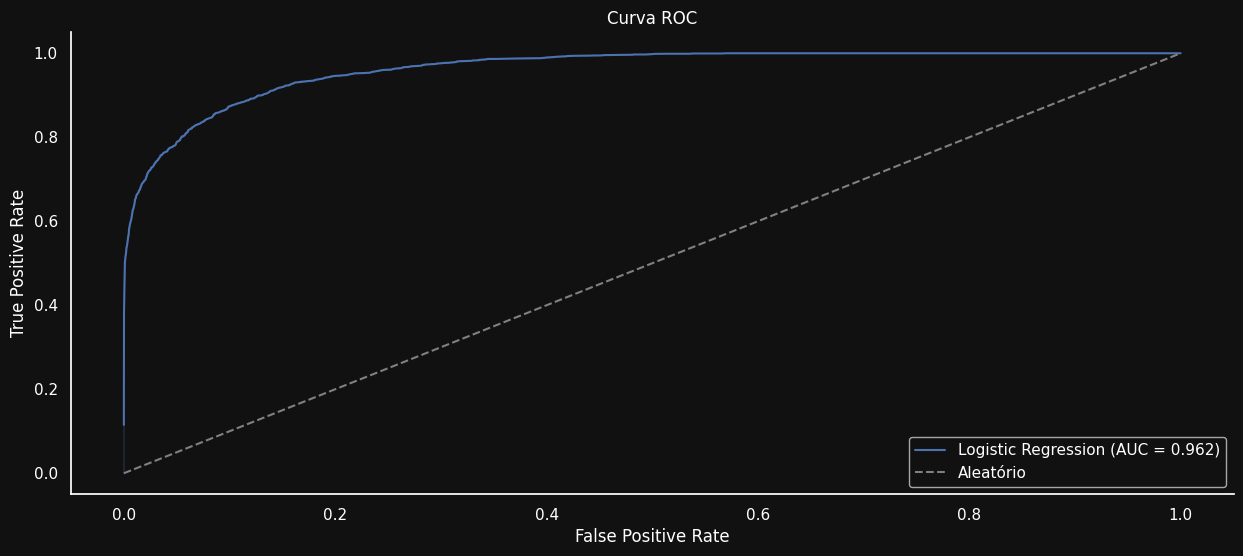

In [7]:
print("Classification Report (Precision, Recall, F1):")
print(classification_report(y_test, y_pred, digits=3))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
sns.lineplot(x=[0,1], y=[0,1], color="gray", linestyle="--", label="Aleatório")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.show()

### Seleção de Variáveis
Correlação de Pearson

In [8]:
display(df.corr(method="pearson"))

,age,hypertension,heart_disease,smoking_history_mapped,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
age,1.00,0.25,0.23,0.25,0.34,0.10,0.11,0.26,-0.03,-0.01
hypertension,0.25,1.00,0.12,0.10,0.15,0.08,0.08,0.20,0.01,-0.00
heart_disease,0.23,0.12,1.00,0.08,0.06,0.07,0.07,0.17,0.08,-0.00
smoking_history_mapped,0.25,0.10,0.08,1.00,0.19,0.04,0.05,0.11,0.02,-0.00
bmi,0.34,0.15,0.06,0.19,1.00,0.08,0.09,0.21,-0.02,0.00
HbA1c_level,0.10,0.08,0.07,0.04,0.08,1.00,0.17,0.40,0.02,-0.00
blood_glucose_level,0.11,0.08,0.07,0.05,0.09,0.17,1.00,0.42,0.02,0.00
diabetes,0.26,0.20,0.17,0.11,0.21,0.40,0.42,1.00,0.04,-0.00
gender_Male,-0.03,0.01,0.08,0.02,-0.02,0.02,0.02,0.04,1.00,-0.01
gender_Other,-0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,1.00


Coeficientes Absolutos

In [9]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coef": np.abs(model.coef_[0])
}).sort_values(by="Coef", ascending=False)

coeffs

,Feature,Coef
5,HbA1c_level,2.33
1,hypertension,0.78
2,heart_disease,0.73
7,gender_Male,0.26
3,smoking_history_mapped,0.15
4,bmi,0.09
0,age,0.05
6,blood_glucose_level,0.03
8,gender_Other,0.02


### Modelo Ajustado
Ajuste de melhor recall em positivo para diabetes 

In [10]:
variaveis = ["HbA1c_level", "blood_glucose_level", "age", "bmi", "hypertension", "smoking_history_mapped"]

X = X[variaveis]
y = df["diabetes"]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000, l1_ratio=0, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report (Precision, Recall, F1):")
print(classification_report(y_test, y_pred, digits=3))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.3f}")

Classification Report (Precision, Recall, F1):
              precision    recall  f1-score   support

           0      0.989     0.884     0.934     18300
           1      0.417     0.890     0.568      1700

    accuracy                          0.885     20000
   macro avg      0.703     0.887     0.751     20000
weighted avg      0.940     0.885     0.902     20000

AUC-ROC: 0.962


### Explicabilidade do Modelo

In [11]:
model.intercept_

array([-2.7867559])

In [12]:
model.coef_

array([[2.31222717, 1.29423684, 1.15377505, 0.64077044, 0.23215948,
        0.22088237]])

Odds ratios ($exp(β)$)

In [13]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coef": np.exp(model.coef_[0])
})
coeffs.sort_values(by="Coef", ascending=False)

,Feature,Coef
0,HbA1c_level,10.10
1,blood_glucose_level,3.65
2,age,3.17
3,bmi,1.90
4,hypertension,1.26
5,smoking_history_mapped,1.25
